In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from pprint import pprint

In [89]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Eli Lilly/data/dataset/train.csv")

In [90]:
df = pd.read_csv("D:/Sashank/Music Data/train.csv")

In [91]:
# Klib to for data cleaning and EDA
import klib

GridSpec(6, 6)

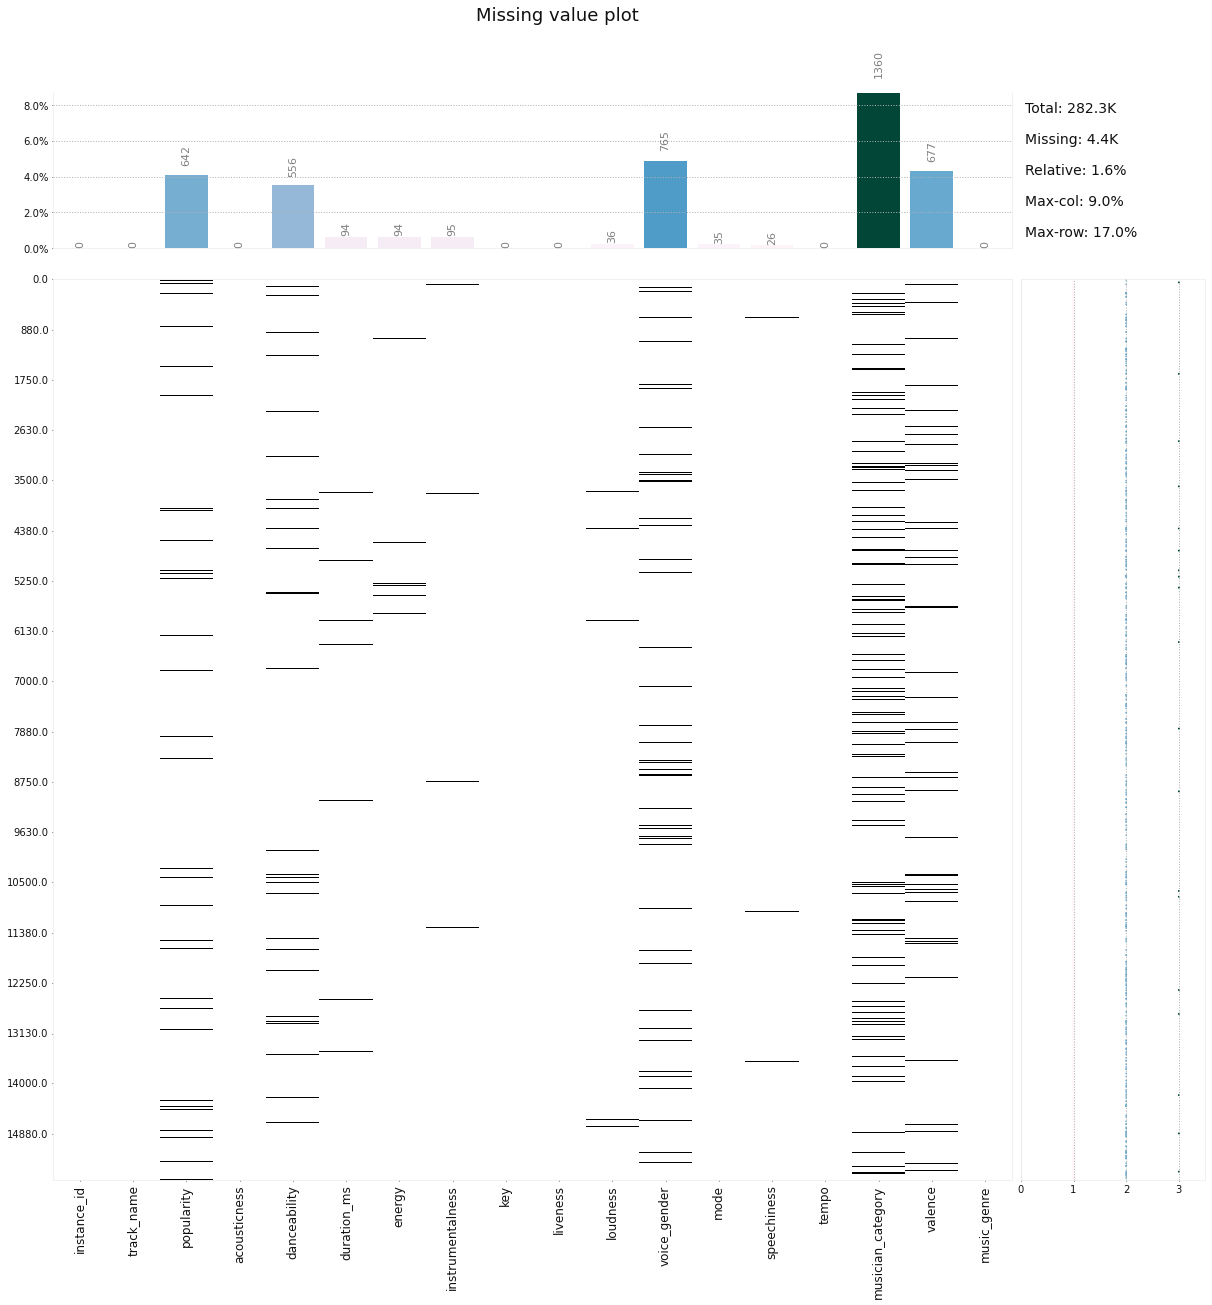

In [92]:
klib.missingval_plot(df)

In [93]:
# # Data Cleaning 
# data_cleaning() drops empty and single valued columns as well as empty and duplocate rows 

In [94]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [95]:
#Dropping NaN Rows from data set 
df1 = df.copy(deep=True)

In [96]:
df.isna().any()

instance_id          False
track_name           False
popularity            True
acousticness         False
danceability          True
duration_ms           True
energy                True
instrumentalness      True
key                  False
liveness             False
loudness              True
voice_gender          True
mode                  True
speechiness           True
tempo                False
musician_category     True
valence               True
music_genre          False
dtype: bool

In [97]:
df1.dropna(axis=0,how="any",inplace=True)


In [98]:
df1.replace("?",np.nan, inplace=True)

In [99]:
df1 = df1.drop(columns=['instance_id','track_name'])

GridSpec(6, 6)

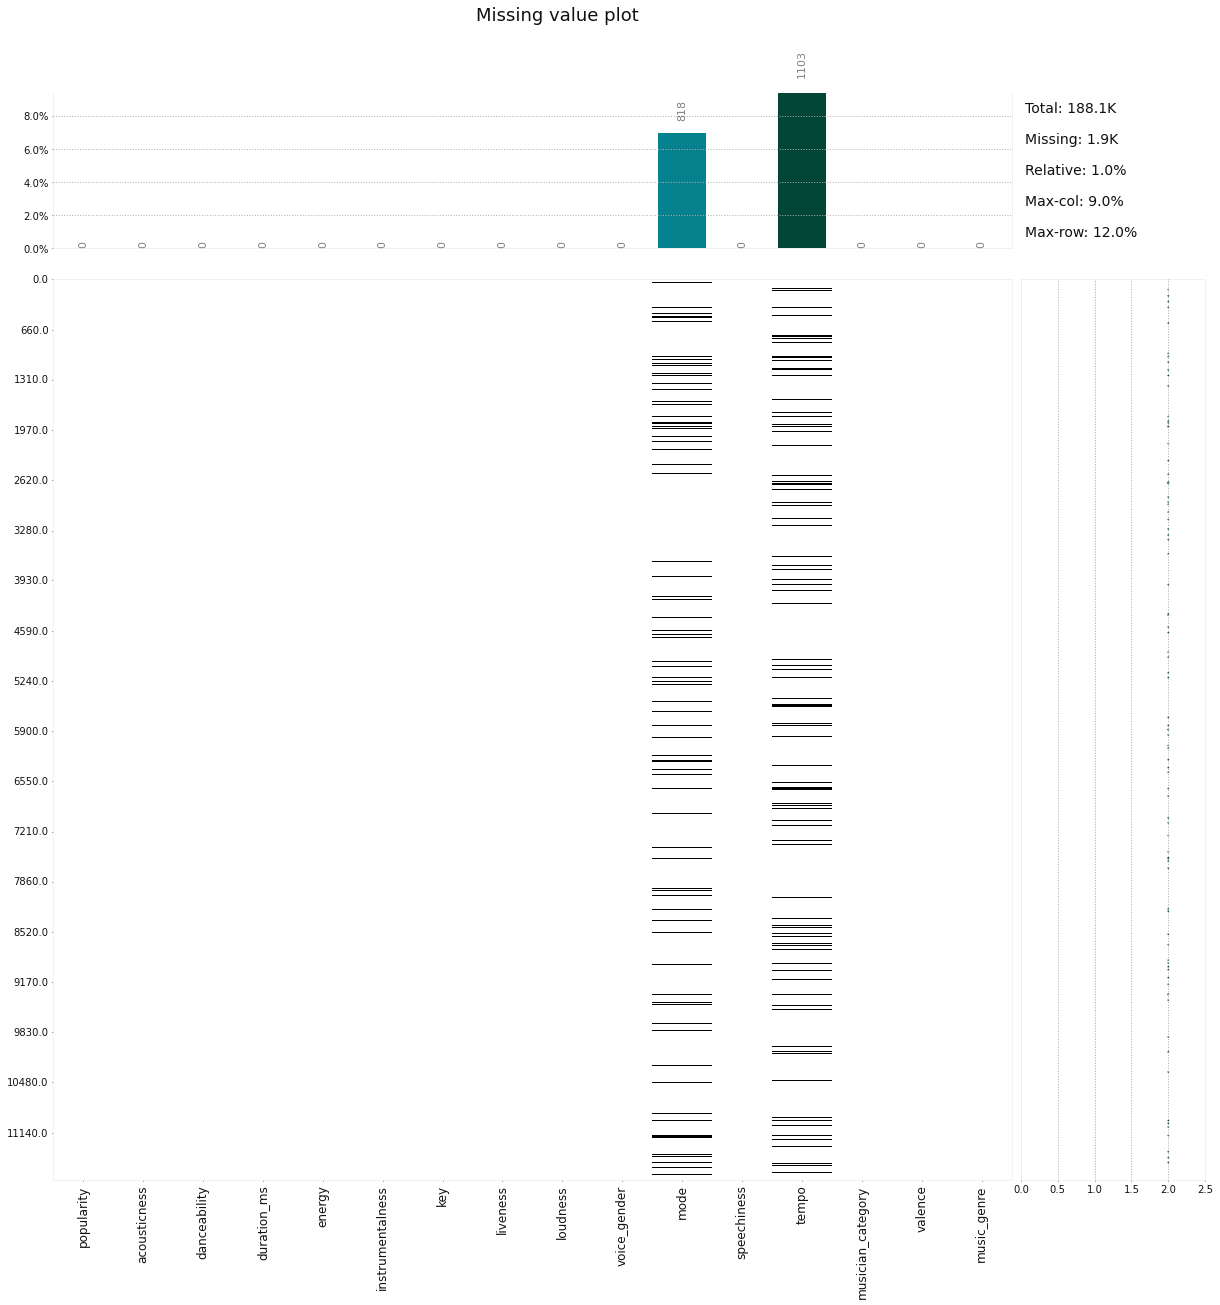

In [100]:
klib.missingval_plot(df1)

In [101]:
df1.dropna(axis=0, how="any", inplace=True)

GridSpec(6, 6)

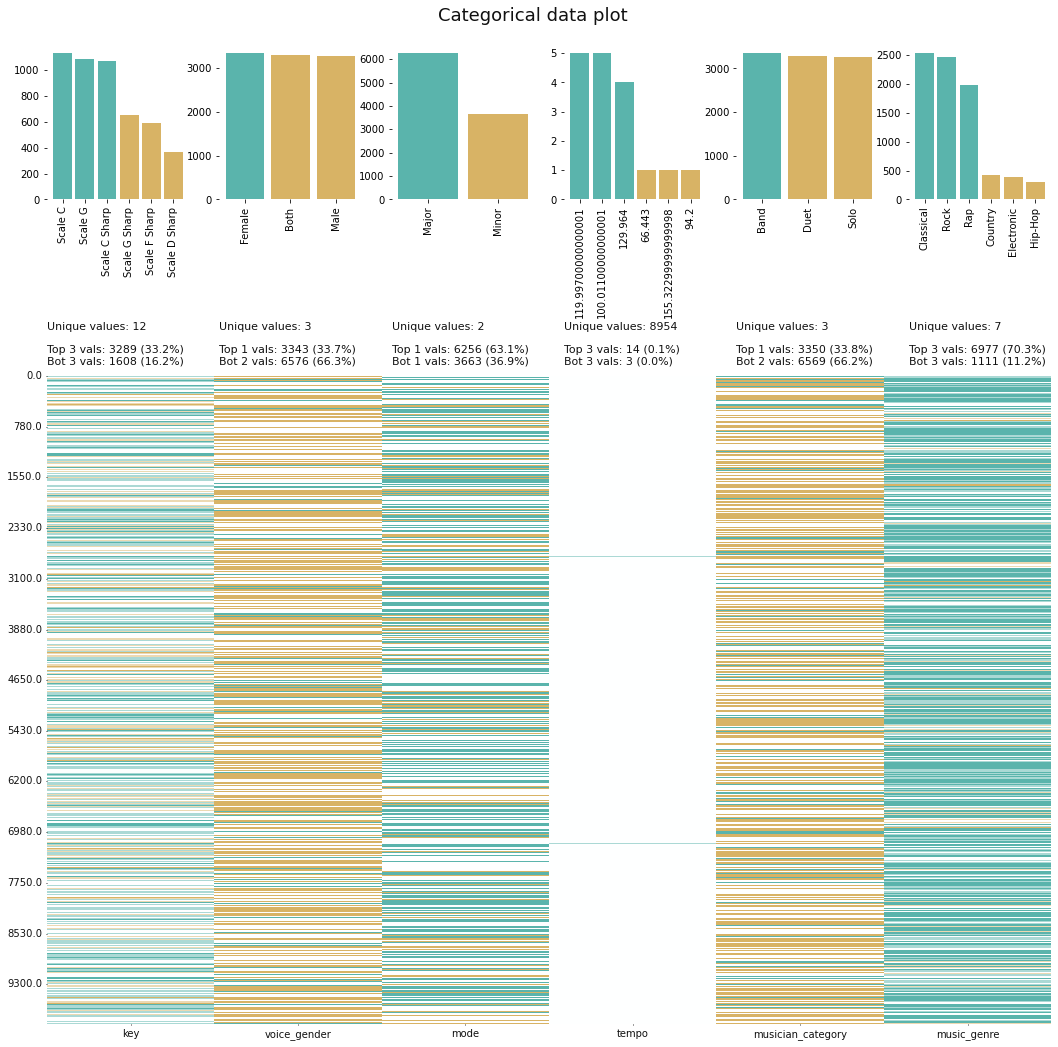

In [102]:
klib.describe.cat_plot(df1)

In [103]:
df1.isna().any()

popularity           False
acousticness         False
danceability         False
duration_ms          False
energy               False
instrumentalness     False
key                  False
liveness             False
loudness             False
voice_gender         False
mode                 False
speechiness          False
tempo                False
musician_category    False
valence              False
music_genre          False
dtype: bool

In [104]:
klib.describe.corr_mat(df1)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.00,-0.56,0.44,-0.15,0.30,-0.50,-0.01,0.52,0.20,0.30
acousticness,-0.56,1.00,-0.54,0.13,-0.48,0.53,-0.11,-0.73,-0.24,-0.40
danceability,0.44,-0.54,1.00,-0.23,0.28,-0.42,0.01,0.53,0.34,0.55
duration_ms,-0.15,0.13,-0.23,1.00,-0.08,0.18,-0.01,-0.14,-0.10,-0.19
energy,0.30,-0.48,0.28,-0.08,1.00,-0.31,0.10,0.46,0.11,0.30
instrumentalness,-0.50,0.53,-0.42,0.18,-0.31,1.00,-0.15,-0.56,-0.25,-0.34
liveness,-0.01,-0.11,0.01,-0.01,0.10,-0.15,1.00,0.12,0.13,0.08
loudness,0.52,-0.73,0.53,-0.14,0.46,-0.56,0.12,1.00,0.21,0.43
speechiness,0.20,-0.24,0.34,-0.10,0.11,-0.25,0.13,0.21,1.00,0.13
valence,0.30,-0.40,0.55,-0.19,0.30,-0.34,0.08,0.43,0.13,1.00


In [105]:
test = klib.clean.convert_datatypes(df1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9919 entries, 2 to 15680
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   popularity         9919 non-null   Float32 
 1   acousticness       9919 non-null   Float32 
 2   danceability       9919 non-null   Float32 
 3   duration_ms        9919 non-null   Float32 
 4   energy             9919 non-null   Float32 
 5   instrumentalness   9919 non-null   Float32 
 6   key                9919 non-null   category
 7   liveness           9919 non-null   Float32 
 8   loudness           9919 non-null   Float32 
 9   voice_gender       9919 non-null   category
 10  mode               9919 non-null   category
 11  speechiness        9919 non-null   Float32 
 12  tempo              9919 non-null   string  
 13  musician_category  9919 non-null   category
 14  valence            9919 non-null   Float32 
 15  music_genre        9919 non-null   category
dtypes: Fl

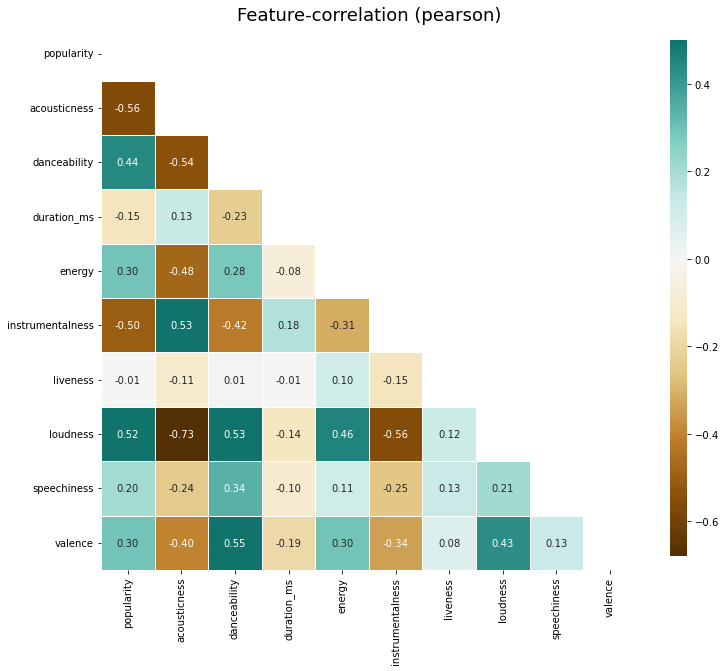

In [106]:
plot = klib.corr_plot(df1)

In [107]:
plot.figure.savefig('corr_plot.pdf')

In [108]:
print(df.shape,df1.shape)

(15681, 18) (9919, 16)


In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9919 entries, 2 to 15680
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         9919 non-null   float64
 1   acousticness       9919 non-null   float64
 2   danceability       9919 non-null   float64
 3   duration_ms        9919 non-null   float64
 4   energy             9919 non-null   float64
 5   instrumentalness   9919 non-null   float64
 6   key                9919 non-null   object 
 7   liveness           9919 non-null   float64
 8   loudness           9919 non-null   float64
 9   voice_gender       9919 non-null   object 
 10  mode               9919 non-null   object 
 11  speechiness        9919 non-null   float64
 12  tempo              9919 non-null   object 
 13  musician_category  9919 non-null   object 
 14  valence            9919 non-null   float64
 15  music_genre        9919 non-null   object 
dtypes: float64(10), object(

In [110]:
s = df1["tempo"] 
s = pd.to_numeric(s)

In [111]:
df1["tempo"] = s

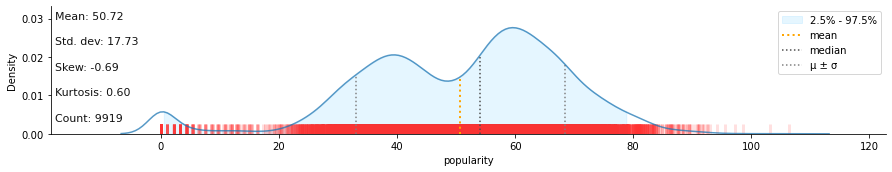

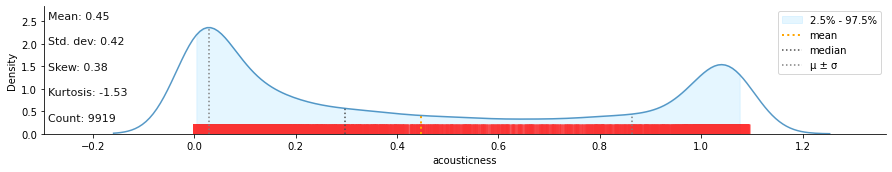

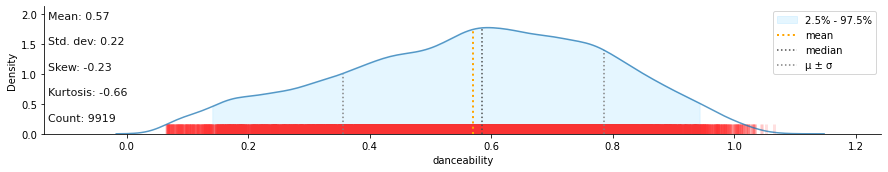

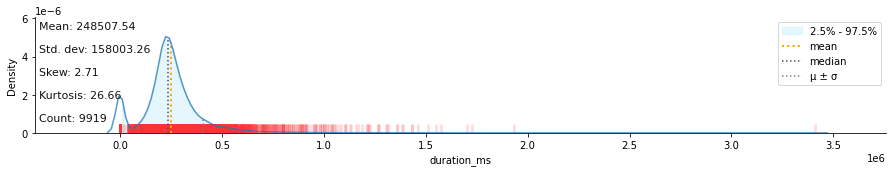

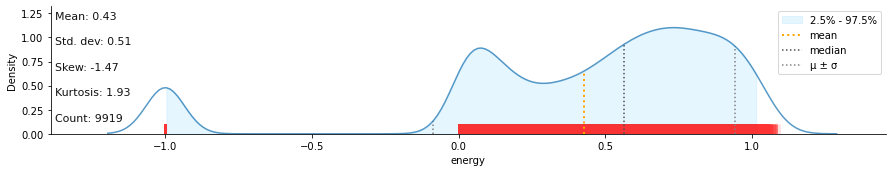

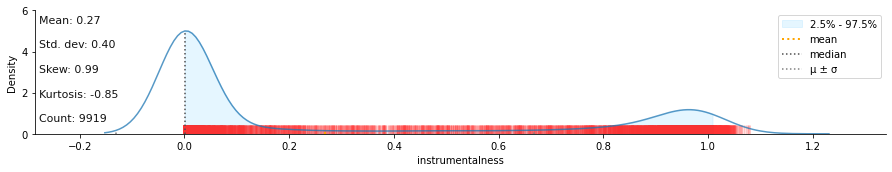

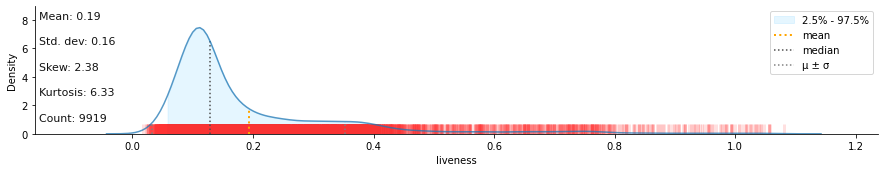

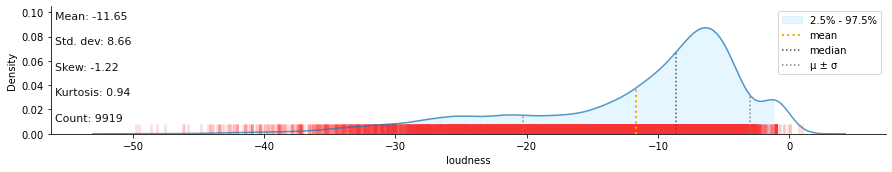

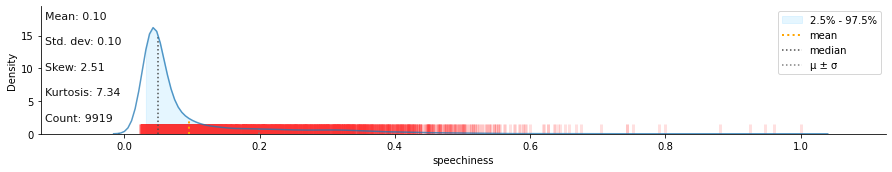

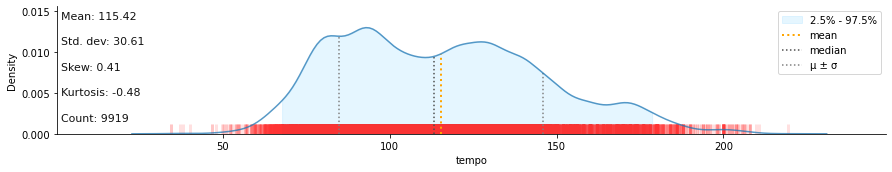

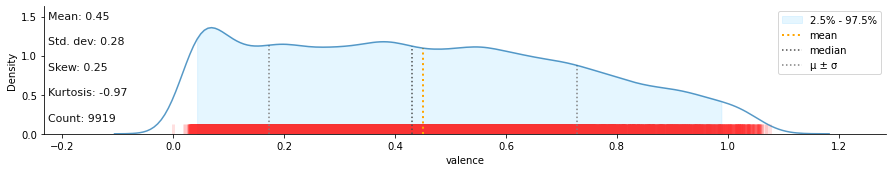

In [112]:
plot_dist = klib.describe.dist_plot(df1)
plot_dist.figure.savefig('dist_plot.pdf')

In [113]:
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

In [114]:
X = df1.iloc[ : , :-1]
X.shape
Y = df1["music_genre"]

In [127]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
target= lb.fit_transform(Y)
Y = pd.DataFrame(target)

C:\Users\sasha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [128]:
y = Y.squeeze()

In [129]:
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [139]:
from sklearn.compose import make_column_transformer, make_column_selector

ohn = OneHotEncoder()
scale = MinMaxScaler()

ohn_ct = make_column_transformer(
    (ohn, categorical_columns),
    remainder = 'passthrough' 
)

df_ohn = ohn_ct.fit_transform(X)
df_ohn = pd.DataFrame(df_ohn)


In [202]:
ohn_ct.get_feature_names()

['onehotencoder__x0_Scale A',
 'onehotencoder__x0_Scale A Sharp',
 'onehotencoder__x0_Scale B',
 'onehotencoder__x0_Scale C',
 'onehotencoder__x0_Scale C Sharp',
 'onehotencoder__x0_Scale D',
 'onehotencoder__x0_Scale D Sharp',
 'onehotencoder__x0_Scale E',
 'onehotencoder__x0_Scale F',
 'onehotencoder__x0_Scale F Sharp',
 'onehotencoder__x0_Scale G',
 'onehotencoder__x0_Scale G Sharp',
 'onehotencoder__x1_Both',
 'onehotencoder__x1_Female',
 'onehotencoder__x1_Male',
 'onehotencoder__x2_Major',
 'onehotencoder__x2_Minor',
 'onehotencoder__x3_Band',
 'onehotencoder__x3_Duet',
 'onehotencoder__x3_Solo',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [203]:
ohn_list = []
for s in list(ohn_ct.get_feature_names())[:-11]:
    ohn_list.append(s.replace(s[:18], '', 1))
#pprint(ohn_list)

In [204]:
col_names = ohn_list + numerical_columns

In [205]:
len(col_names)

31

In [206]:
df_final.shape

(9919, 31)

In [207]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

preprocessing = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_columns),
        ("Scale", MinMaxScaler(), numerical_columns)]
)
df_final = preprocessing.fit_transform(X)
df_final = pd.DataFrame(x)
df_final

,Scale A,Scale A Sharp,Scale B,Scale C,Scale C Sharp,Scale D,Scale D Sharp,Scale E,Scale F,Scale F Sharp,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018311,0.902400,0.080142,0.887279,0.000000,0.022379,0.882529,0.098362,0.382038,0.590104
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.784686,0.215721,0.120262,0.532503,0.002553,0.109658,0.450206,0.015648,0.420772,0.069094
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000417,0.903174,0.059567,0.000000,0.000356,0.057374,0.837753,0.028831,0.381709,0.449637
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082993,0.315132,0.080780,0.818889,0.000000,0.067399,0.863266,0.047696,0.769256,0.515491
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.927117,0.606771,0.060785,0.500645,0.135681,0.087138,0.444469,0.043086,0.447650,0.548416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.963249,0.071337,0.055240,0.497832,0.949496,0.110721,0.404582,0.034693,0.209851,0.037778
9915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.792196,0.322454,0.000000,0.571707,0.026631,0.216570,0.659023,0.021906,0.482036,0.579883
9916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.807131,0.394829,0.110876,0.644538,0.000481,0.624106,0.486386,0.434696,0.514088,0.565495
9917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.103623,0.579299,0.044343,0.913452,0.000082,0.139350,0.837931,0.037324,0.441822,0.373919


In [194]:
df_final.columns = col_names

In [195]:
df_final.columns

Index(['Scale A', 'Scale A Sharp', 'Scale B', 'Scale C', 'Scale C Sharp',
       'Scale D', 'Scale D Sharp', 'Scale E', 'Scale F', 'Scale F Sharp',
       'Scale G', 'Scale G Sharp', 'Both', 'Female', 'Male', 'Major', 'Minor',
       'Band', 'Duet', 'Solo', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

<AxesSubplot:xlabel='valence', ylabel='Density'>

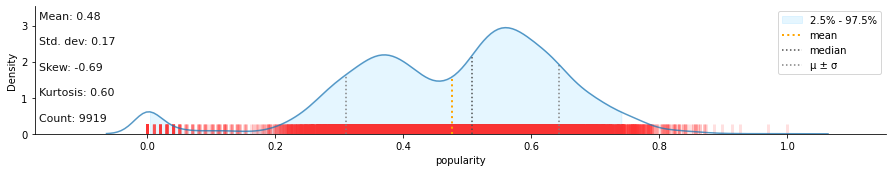

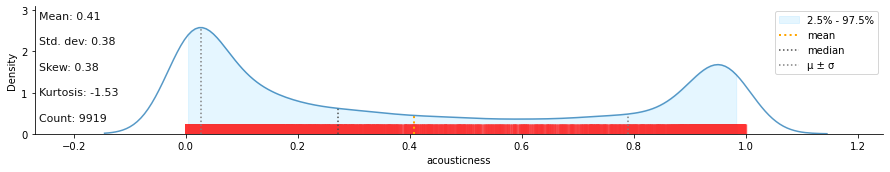

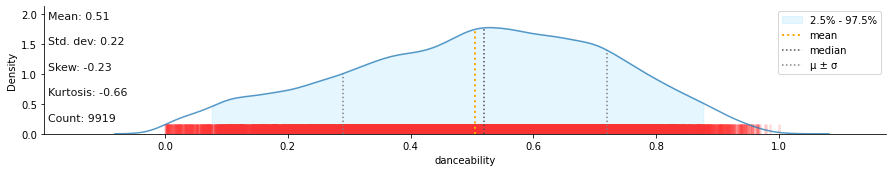

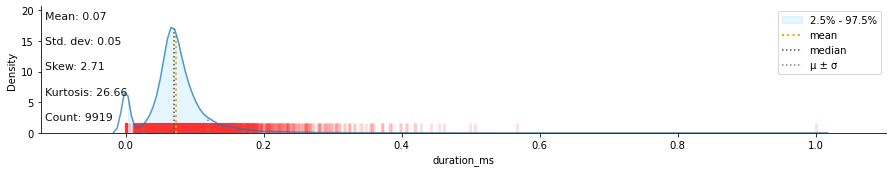

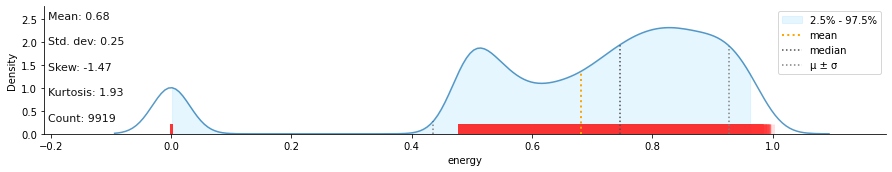

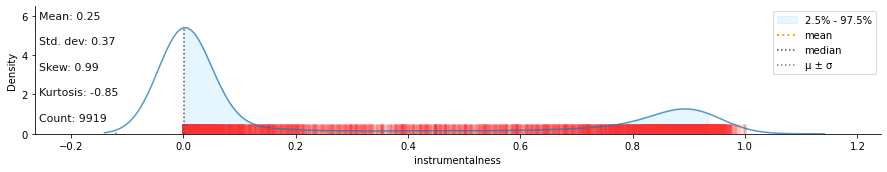

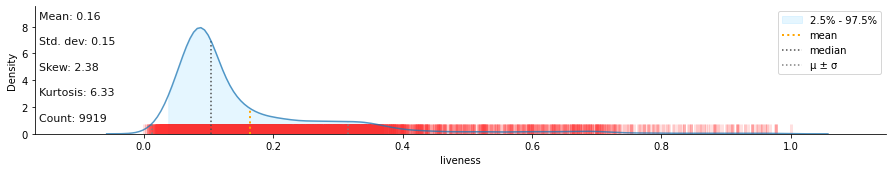

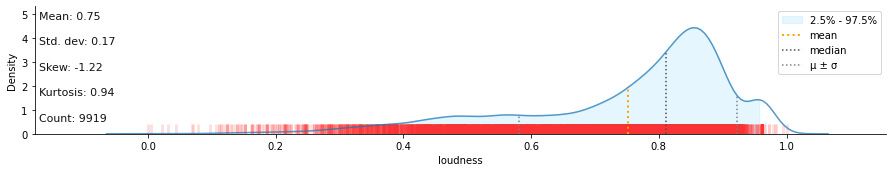

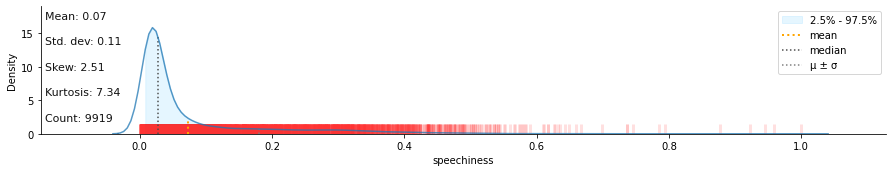

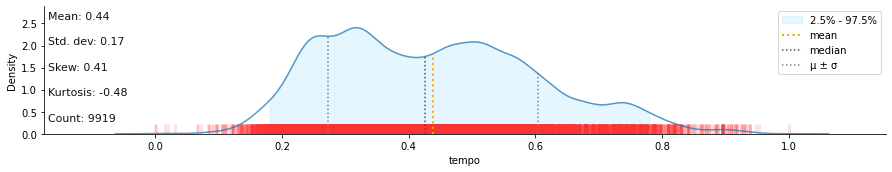

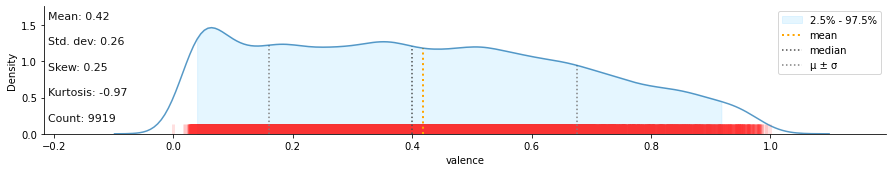

In [208]:
klib.dist_plot(df_final)

In [196]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_final,y,test_size=0.2)

In [197]:
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

k_range = list(range(1,15))
scores = []
error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy_score(Y_test, y_pred)
    scores.append(metrics.accuracy_score(Y_test,y_pred))
    error.append(np.mean(y_pred != Y_test))

scores= np.mean(scores)
print(scores)

0.5842813940092165


In [198]:
from sklearn.model_selection import cross_val_score

k_range = list(range(1, 15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [199]:
print(k_scores)

[0.5576543496145429, 0.5183369279685918, 0.5597944546265973, 0.5836130690138206, 0.5911735557666102, 0.5882742891992593, 0.5929415445602422, 0.5959656439691126, 0.5936961003236759, 0.5958381111806391, 0.591425603755785, 0.5892837517192308, 0.5851229746427336, 0.5821004634379536]


Text(0, 0.5, 'Cross-Validated Accuracy')

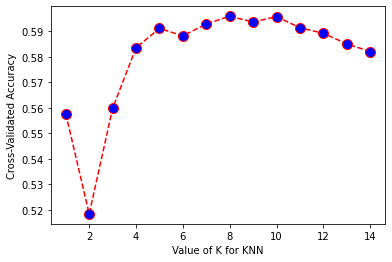

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Mean Error')

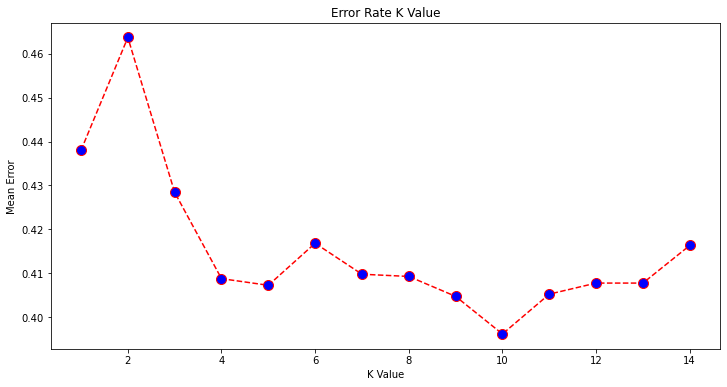

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
# Best Value of K
knn = KNeighborsClassifier(n_neighbors=7)
knn_base = knn.fit(X_train,Y_train)
y_pred_knn_base = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred_knn_base))
#print(cross_val_score(knn,X_test,Y_test, cv=10, scoring="accuracy").mean())


## GridSearch


In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 15))
weight_options = ['uniform', 'distance']
algorithms = [ 'ball_tree', 'kd_tree', 'brute']

In [ ]:
param_grid = dict(n_neighbors=k_range, weights = weight_options, algorithm = algorithms)
pprint(param_grid)


In [ ]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid.fit(X_train,Y_train)

In [ ]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


In [ ]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

## Using the best parameters to make predictions


In [ ]:
y_pred_grid_knn = grid.predict(X_test)
accuracy_score(Y_test, y_pred_grid_knn)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_grid_knn))

In [ ]:
print(metrics.f1_score(Y_test,y_pred_grid_knn,average="weighted"))
f1_score_knn = metrics.f1_score(Y_test,y_pred_grid_knn,average="weighted")

In [ ]:
print(metrics.roc_auc_score(Y_test,y_score = grid.predict_proba(X_test), multi_class='ovr'))
roc_auc_score_knn = metrics.roc_auc_score(Y_test,y_score = grid.predict_proba(X_test), multi_class='ovr')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(cv = 5, random_state = 0,solver='newton-cg',n_jobs = -1).fit(X_train,Y_train)


In [ ]:
y_pred_log_test = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_log_test))

In [ ]:
from sklearn.metrics import f1_score
f1_score_log = metrics.f1_score(Y_test,y_pred_log_test,average='weighted')
print(f1_score_log)


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score_log = metrics.roc_auc_score(Y_test, y_score=logreg.predict_proba(X_test), multi_class='ovr')
pprint(roc_auc_score_log)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred_log_test)

## Classification: Full Trees

In [ ]:
from sklearn.tree import  DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [ ]:
clf_pred = clf.predict(X_test)

In [ ]:
clf_f1 = metrics.f1_score(Y_test,clf_pred,average="weighted")
clf_f1

In [ ]:
roc_clf =  metrics.roc_auc_score(Y_test,y_score = clf.predict_proba(X_test), multi_class='ovr')
roc_clf

## Hyperpapmeter optimization for Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)

In [ ]:
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


In [ ]:
tuned_tree_cv = RandomizedSearchCV(estimator             = clf,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 300,
                                   scoring = "accuracy"
                                   )



In [ ]:
tuned_tree_cv.fit(X_train, Y_train)


In [ ]:
tuned_tree_cv.best_params_

In [ ]:
y_best_dtc = tuned_tree_cv.predict(X_test)
f1_score_dtc = metrics.f1_score(Y_test,y_best_dtc,average="weighted")
print(f1_score_dtc)


In [ ]:
roc_auc_score_dtc = roc_auc_score(Y_test, y_score =tuned_tree_cv.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_dtc)


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier.fit(X_train, Y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [ ]:
print(rf_classifier.score(X_test,Y_test))

In [ ]:
f1_score_rf = metrics.f1_score(Y_test,y_pred_rf,average="weighted")
print(f1_score_rf)

In [ ]:
roc_auc_score_rf = roc_auc_score(Y_test, y_score= rf_classifier.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_rf)


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [ ]:
rf_rand = rf_random.fit(X_train, Y_train)

In [ ]:
rf_random.best_params_

In [ ]:
y_best_rf = rf_rand.predict(X_test)
print(metrics.f1_score(Y_test,y_best_rf,average="weighted"))
f1_score_best_rf = metrics.f1_score(Y_test,y_best_rf,average="weighted")

In [ ]:
roc_auc_score_rf_best = roc_auc_score(Y_test,y_score=rf_rand.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_rf_best)

In [ ]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

In [ ]:
og = df1.iloc[:,:-1]


In [ ]:
feature_importances = list(zip(cols, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked]

In [ ]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

## Gradient Boosting Classifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # gbm

gb = GradientBoostingClassifier()
gb = gb.fit(X_test,Y_test)

In [ ]:
y_pred_gb = gb.predict(X_test)

In [ ]:
f1_score_gb = metrics.f1_score(Y_test,y_pred_gb, average='weighted')
print(f1_score_gb)

In [ ]:
roc_auc_score_gb = roc_auc_score(Y_test,y_score=gb.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_gb)

In [ ]:
print(classification_report(Y_test,y_pred_gb))

In [ ]:
feature_importances = list(zip(cols, gb.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked]

In [ ]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Gradient Boosting Classifier Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [ ]:
model_performance = {
    
    'Model Name'        : ['Logistic Regression',
                           'Classification Trees', 
                           'Random Forest',
                           'Gradient Boosted Models'],
           
    'AUC Score'         : [roc_auc_score_log, 
                           roc_auc_score_dtc, 
                           roc_auc_score_rf_best,
                           roc_auc_score_gb
                            ],
    'F1 Score'          :   [f1_score_log,
                            f1_score_dtc,
                            f1_score_best_rf,
                            f1_score_gb
                            ]
}

In [ ]:
model_performance = pd.DataFrame(model_performance)


In [ ]:
model_performance
